In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV, ElasticNetCV

In [26]:
df_train = pd.read_csv('train.csv')

In [27]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [28]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing..

0

In [29]:
y = df_train['SalePrice']
X = df_train.iloc[:,0:62]

In [30]:
from sklearn.preprocessing import LabelEncoder
for column in X.columns:
    if X[column].dtype == type(object):
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])

In [31]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = df_train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.791069
GrLivArea        0.708618
GarageCars       0.640473
GarageArea       0.623423
TotalBsmtSF      0.613905
1stFlrSF         0.605968
FullBath         0.560881
TotRmsAbvGrd     0.533779
YearBuilt        0.523273
YearRemodAdd     0.507430
Fireplaces       0.466968
BsmtFinSF1       0.386436
WoodDeckSF       0.324422
2ndFlrSF         0.319464
OpenPorchSF      0.315831
HalfBath         0.284400
LotArea          0.263837
BsmtFullBath     0.227082
BsmtUnfSF        0.214446
BedroomAbvGr     0.168235
ScreenPorch      0.111419
PoolArea         0.092397
MoSold           0.046380
3SsnPorch        0.044571
BsmtFinSF2      -0.011412
BsmtHalfBath    -0.016873
MiscVal         -0.021200
Id              -0.021756
LowQualFinSF    -0.025620
YrSold          -0.028907
OverallCond     -0.077924
MSSubClass      -0.084230
EnclosedPorch   -0.128627
KitchenAbvGr    -0.135935
Name: SalePrice, dtype: float64


In [32]:
#clf = RandomForestRegressor(n_estimators=1000)
#clf = clf.fit(X, y)
#model = SelectFromModel(clf, prefit=True)
#X_new = model.transform(X)

#X_new.shape


In [33]:
#X_new = X_new[:,[0,1,3,4,5,7]]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=46)
X_train.shape

(977, 62)

In [36]:
# 2* Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 60.0


In [37]:
print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)

Try again for more precision with alphas centered around 60.0


In [38]:
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 84.0


In [39]:
# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print(coefs)

Id                  -3.002884
MSSubClass         -83.742179
MSZoning           -39.363795
LotArea              0.343442
Street            1585.893761
LotShape         -1084.783335
LandContour       3459.215934
Utilities         -524.027739
LotConfig          -39.573145
LandSlope         3429.152900
Neighborhood       501.848201
Condition1       -1947.563828
Condition2       -5266.351732
BldgType         -2795.025489
HouseStyle       -1123.933801
OverallQual      15032.164146
OverallCond       3632.405278
YearBuilt          266.079904
YearRemodAdd       110.161023
RoofStyle         2619.786944
RoofMatl          2041.746848
Exterior1st       -538.513374
Exterior2nd        204.408663
ExterQual        -8980.714874
ExterCond          254.600652
Foundation         860.878455
BsmtFinSF1           4.670052
BsmtFinSF2           9.187415
BsmtUnfSF           -9.404312
TotalBsmtSF          4.453155
                     ...     
CentralAir        -987.004585
Electrical         314.948458
1stFlrSF  

In [40]:
str(sum(coefs == 0))

'0'

In [41]:
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")

Ridge picked 62 features and eliminated the other 0 features


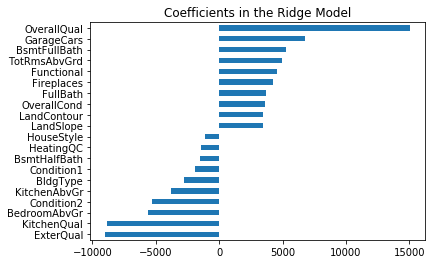

In [42]:
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

In [43]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model,X1,y1):
    rmse= np.sqrt(-cross_val_score(model, X1, y1, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model,X1,y1):
    rmse= np.sqrt(-cross_val_score(model, X1, y1, scoring = scorer, cv = 10))
    return(rmse)

In [44]:
# Define error measure for official scoring : RMSE
scorerR2 = make_scorer(r2_score)

def r2score_cv_train(model,X1,y1):
    rmse= cross_val_score(model, X1, y1, scoring = scorerR2, cv = 10)
    return(rmse)

def r2score_cv_test(model,X1,y1):
    rmse= cross_val_score(model, X1, y1, scoring = scorerR2, cv = 10)
    return(rmse)

In [45]:
print("Ridge RMSE on Training set :", rmse_cv_train(ridge,X_train,y_train).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge,X_test,y_test).mean())

Ridge RMSE on Training set : 39318.73014838282
Ridge RMSE on Test set : 27542.37912572707


In [46]:
# Look at predictions on training and validation set
print("R^2 score on Training set :", r2score_cv_train(ridge, X_train, y_train).mean())
print("R^2 score on Test set :", r2score_cv_test(ridge, X_test, y_test).mean())

R^2 score on Training set : 0.7066894521247736
R^2 score on Test set : 0.856372889779289


In [47]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Best alpha : 1.0


In [48]:
print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Try again for more precision with alphas centered around 1.0
Best alpha : 1.4


In [49]:
# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print(coefs)

Id                  -3.185674
MSSubClass         -37.426178
MSZoning          -553.806683
LotArea              0.333668
Street           46616.606777
LotShape         -1181.509548
LandContour       5209.052648
Utilities       -46293.110179
LotConfig         -119.775474
LandSlope        11699.322883
Neighborhood       526.688495
Condition1       -2614.361656
Condition2      -13757.374799
BldgType         -3940.061860
HouseStyle       -1432.327053
OverallQual      15161.307916
OverallCond       4045.679123
YearBuilt          196.407872
YearRemodAdd        31.805388
RoofStyle         2855.361463
RoofMatl          2097.735070
Exterior1st       -549.869978
Exterior2nd        161.873114
ExterQual       -11444.127546
ExterCond          944.797630
Foundation        1304.405480
BsmtFinSF1           6.607087
BsmtFinSF2          11.026059
BsmtUnfSF           -4.632569
TotalBsmtSF         -1.665467
                     ...     
CentralAir       -4814.883872
Electrical         134.776059
1stFlrSF  

In [50]:
str(sum(coefs == 0))

'0'

In [51]:
print("Lasso picked " + str(sum(coefs > 0)) + " features and eliminated the other " +  \
      str(sum(coefs <= 0)) + " features")

Lasso picked 35 features and eliminated the other 27 features


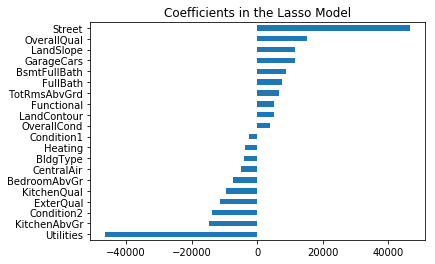

In [52]:
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [53]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model,X1,y1):
    rmse= np.sqrt(-cross_val_score(model, X1, y1, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model,X1,y1):
    rmse= np.sqrt(-cross_val_score(model, X1, y1, scoring = scorer, cv = 10))
    return(rmse)

In [54]:
# Define error measure for official scoring : RMSE
scorerR2 = make_scorer(r2_score)

def r2score_cv_train(model,X1,y1):
    rmse= cross_val_score(model, X1, y1, scoring = scorerR2, cv = 10)
    return(rmse)

def r2score_cv_test(model,X1,y1):
    rmse= cross_val_score(model, X1, y1, scoring = scorerR2, cv = 10)
    return(rmse)

In [55]:
print("Lasso RMSE on Training set :", rmse_cv_train(lasso,X_train,y_train).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso,X_test,y_test).mean())

Lasso RMSE on Training set : 39968.51057191684
Lasso RMSE on Test set : 28355.278786575327


In [56]:
# Look at predictions on training and validation set
print("R^2 score on Training set :", r2score_cv_train(lasso, X_train, y_train).mean())
print("R^2 score on Test set :", r2score_cv_test(lasso, X_test, y_test).mean())

R^2 score on Training set : 0.6982956725218978
R^2 score on Test set : 0.8464934379338687
